# Task #2: To Explore Supervised Machine Learning

# Importing libraries

In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
  
list_1 = [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
   
list_2 = [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86] 
  
df = pd.DataFrame(list(zip(list_1, list_2)), 
               columns =['Hours', 'Scores']) 
df.sample(7)

,Hours,Scores
0,2.5,21
3,8.5,75
1,5.1,47
9,2.7,25
13,3.3,42
7,5.5,60
2,3.2,27


In [62]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Hours vs Score

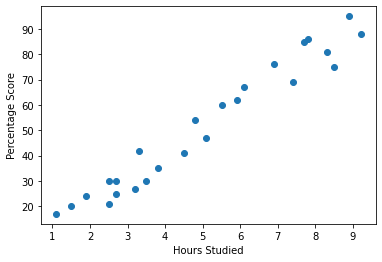

In [44]:
plt.scatter(df.Hours, df.Scores)   
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can see the Linear relation between Hours and Scores

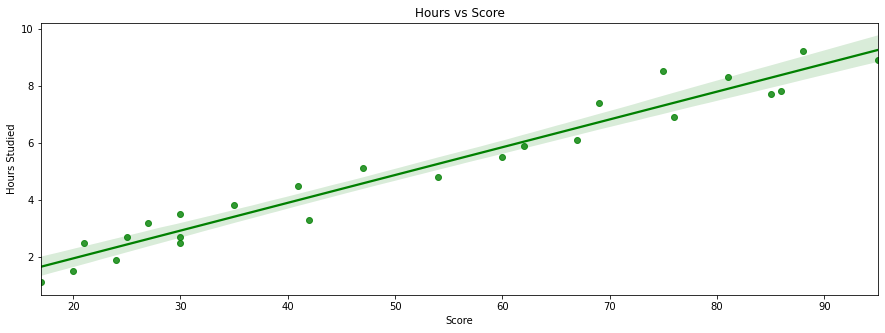

In [71]:
plt.figure(figsize=(15,5))
sns.regplot(df['Scores'],df['Hours'],color='green')
plt.title('Hours vs Score')  
plt.ylabel('Hours Studied')  
plt.xlabel('Score') 
plt.show()

# Applying Linear Regression

In [73]:
x= df.iloc[:, :-1].values  
y= df.iloc[:, 1].values  

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [81]:
#X_train.shape
#X_test.shape

In [82]:
Linear_reg=LinearRegression()
Linear_reg.fit(X_train,y_train)

LinearRegression()

In [83]:
print(Linear_reg.coef_)

[9.60498629]


In [84]:
print(Linear_reg.intercept_)

3.0980408893375326


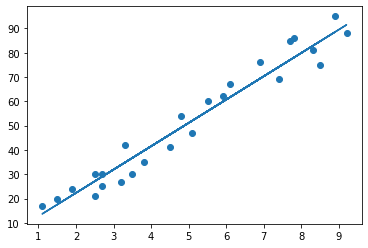

In [85]:
line = Linear_reg.coef_*x+Linear_reg.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Predicting test data

In [86]:
y_pred=Linear_reg.predict(X_test)

In [87]:
y_pred

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

# Actual and predicted

In [89]:
pd.DataFrame(data=[y_test,y_pred],index=['actual','predicted']).transpose()

,actual,predicted
0,69.0,74.174939
1,67.0,61.688457
2,27.0,33.833997
3,85.0,77.056435
4,54.0,49.201975


# Root mean squared error

In [53]:
from sklearn.metrics import r2_score

In [54]:
print("R-Squared Value for Training Set: {:.3f}".format(Linear_reg.score(X_train,y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(Linear_reg.score(X_test,y_test)))

R-Squared Value for Training Set: 0.964
R-Squared Value for Test Set: 0.842


# Mean Absolute Error

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432


# Accuracy

In [90]:
Accu=Linear_reg.score(X_test,y_test)*100
print('Accuracy is {} '.format(Accu))

Accuracy is 90.00546706590143 


# Predicting score if a student study for 9.25 hours

In [93]:
y1_pred=Linear_reg.predict([[9.25]])

In [94]:
print('predicted score :',y1_pred)

predicted score : [91.94416405]
